<a href="https://colab.research.google.com/github/69421/mbacke2801/blob/main/Lab_15_Box_Plot_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-05 14:42:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  39.4MB/s    in 5.7s    

2025-06-05 14:43:02 (35.4 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [57]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [58]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [59]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [60]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [61]:
print(df_comptotal['CompTotal'].quantile([0.90, 0.95, 0.99]))


0.90      1200000.0
0.95      3600000.0
0.99    117728100.0
Name: CompTotal, dtype: float64


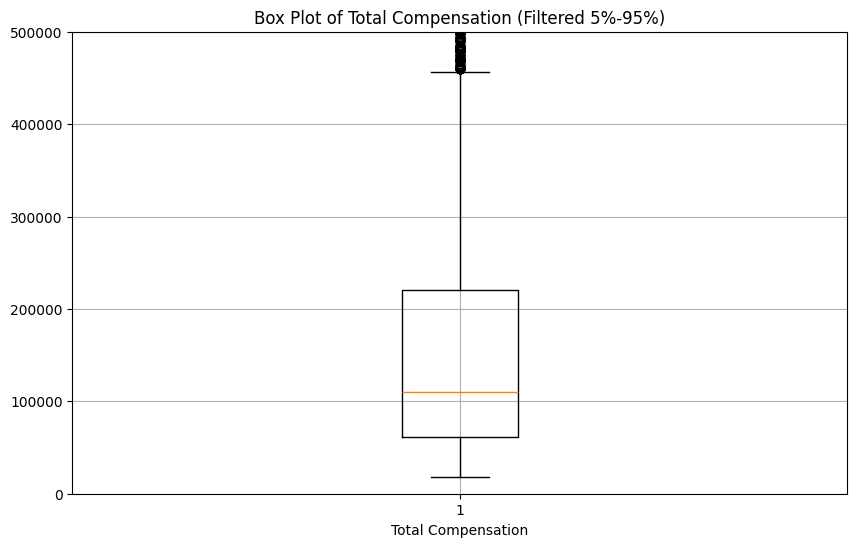

In [62]:
import matplotlib.pyplot as plt

# Supposons qu’on limite aux 95 % des données (pour ignorer les extrêmes)
q_low = df_comptotal['CompTotal'].quantile(0.05)
q_high = df_comptotal['CompTotal'].quantile(0.95)

# Filtrage des données entre le 5e et le 95e percentile
filtered = df_comptotal[(df_comptotal['CompTotal'] >= q_low) & (df_comptotal['CompTotal'] <= q_high)]

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(filtered['CompTotal'], vert=True)
plt.title('Box Plot of Total Compensation (Filtered 5%-95%)')
plt.xlabel('Total Compensation')
plt.grid(True)
plt.ylim(0, 500000)
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [63]:
print(df_age)
print(df_comptotal)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568
       CompTotal
72     2040000.0
374      28000.0
379      85000.0
385      50000.0
389     110000.0
...          ...
65396    36000.0
65401    40000.0
65408    61000.0
65412    58000.0
65431    55000.0

[33740 rows x 1 columns]


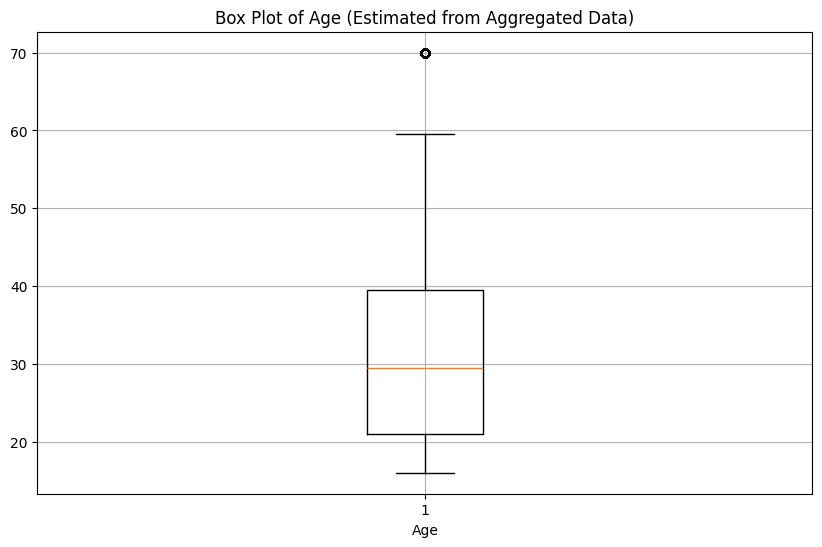

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ton DataFrame d'origine
data = {
    'Age': [
        '18-24 years old', '25-34 years old', '35-44 years old',
        '45-54 years old', '55-64 years old', '65 years or older',
        'Prefer not to say', 'Under 18 years old'
    ],
    'count': [14098, 23911, 14942, 6249, 2575, 772, 322, 2568]
}
df_age = pd.DataFrame(data)

# Mapping des âges directement sur la colonne 'Age'
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Appliquer le mapping et filtrer les valeurs non mappées
df_age['AgeNumeric'] = df_age['Age'].map(age_mapping)
df_age = df_age.dropna(subset=['AgeNumeric'])

# Répéter les âges selon le count
age_values = np.repeat(df_age['AgeNumeric'], df_age['count'].astype(int))

# Tracer le boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(age_values, vert=True)
plt.title('Box Plot of Age (Estimated from Aggregated Data)')
plt.xlabel('Age')
plt.grid(True)
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x800 with 0 Axes>

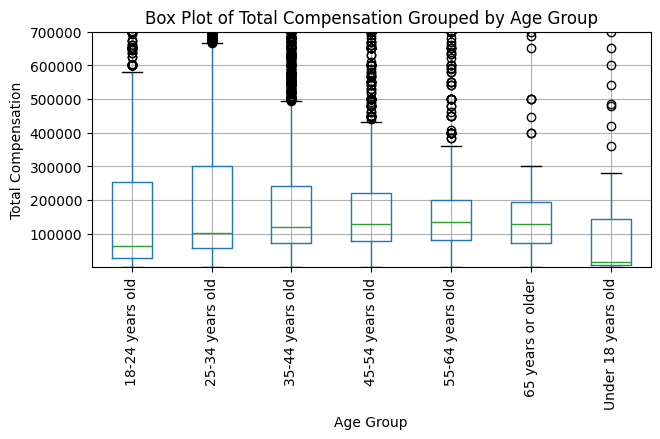

In [77]:
# Define a query to get CompTotal and Age
QUERY = """
SELECT CompTotal, Age
FROM main
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Filter out rows with null CompTotal or Age
df_age_comp_filtered = df_age_comp.dropna(subset=['CompTotal', 'Age'])

# Create a list of unique age groups for ordering
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Filter for valid age groups
df_age_comp_valid_age = df_age_comp_filtered[df_age_comp_filtered['Age'].isin(age_order)]


# Create the box plot
plt.figure(figsize=(12, 8))
df_age_comp_valid_age.boxplot(column='CompTotal', by='Age', rot=90)
plt.title('Box Plot of Total Compensation Grouped by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.suptitle('') # Suppress the default title
plt.tight_layout()
plt.ylim(1, 700000)  # Eviter zéro en log scale

plt.show()



**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


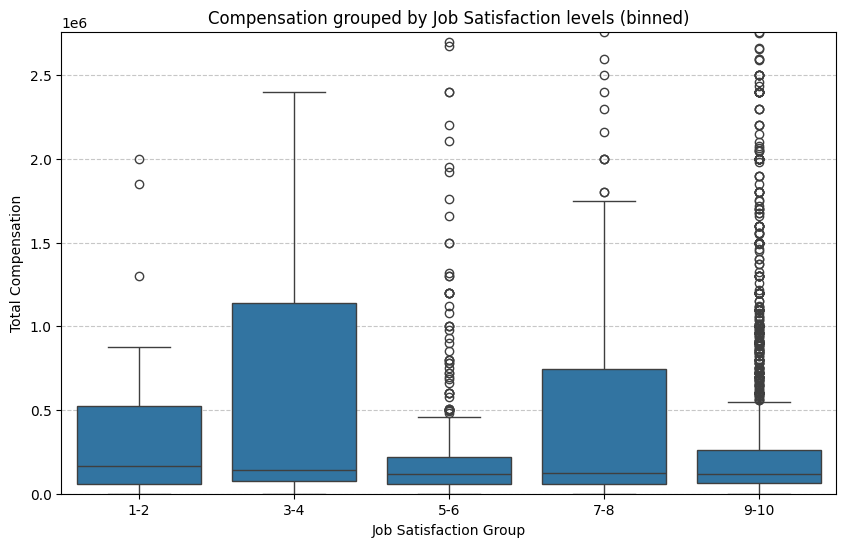

In [105]:
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main
"""
df_filtered = df_filtered.copy()  # crée une copie indépendante

df_filtered['JobSatGroup'] = pd.cut(
    df_filtered['JobSatPoints_6'].astype(float),
    bins=[0, 2, 4, 6, 8, 10],
    labels=['1-2', '3-4', '5-6', '7-8', '9-10']
)


upper_limit = df_filtered['CompTotal'].quantile(0.937)

plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatGroup', y='CompTotal', data=df_filtered)
plt.title('Compensation grouped by Job Satisfaction levels (binned)')
plt.xlabel('Job Satisfaction Group')
plt.ylabel('Total Compensation')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, upper_limit)
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


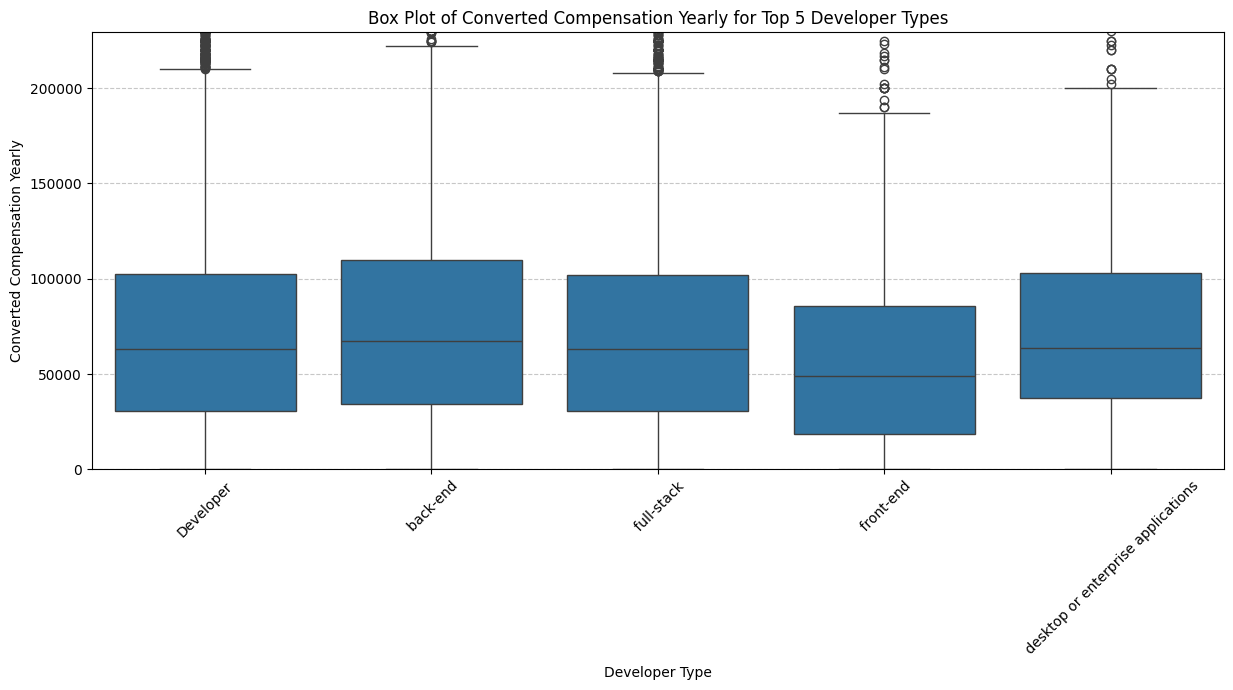

In [116]:


# 1. Charger les données avec les colonnes nécessaires
QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# 2. Nettoyer les données : supprimer les lignes sans salaire ou sans type de développeur
df_clean = df.dropna(subset=['ConvertedCompYearly', 'DevType'])

# 3. Si DevType contient plusieurs rôles par personne (ex: "Developer, Manager"),
#    il faut splitter pour compter correctement
df_clean_expanded = df_clean.assign(DevType=df_clean['DevType'].str.split(',')).explode('DevType')

# 4. Trouver les 5 types de développeurs les plus fréquents
top5_devtypes = df_clean_expanded['DevType'].value_counts().head(5).index.tolist()

# 5. Filtrer uniquement les développeurs de ces 5 types
df_top5 = df_clean_expanded[df_clean_expanded['DevType'].isin(top5_devtypes)]
upper_limit2 = df_top5['ConvertedCompYearly'].quantile(0.97)
# 6. Plot boxplot par type de développeur
plt.figure(figsize=(12, 7))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top5)
plt.title('Box Plot of Converted Compensation Yearly for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation Yearly')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0, upper_limit2)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


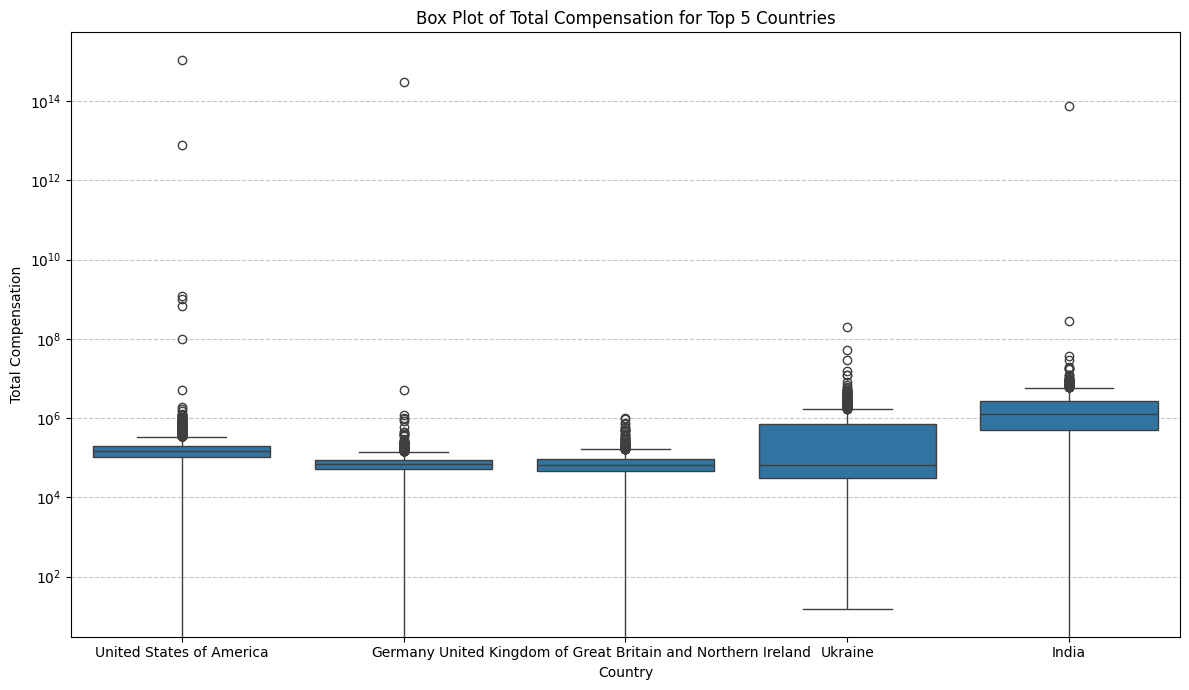

In [122]:


# 1. Charger les données nécessaires
QUERY = """
SELECT CompTotal, Country
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# 2. Supprimer les lignes avec valeurs manquantes
df_clean = df.dropna(subset=['CompTotal', 'Country'])

# 3. Identifier les 5 pays les plus représentés
top5_countries = df_clean['Country'].value_counts().head(5).index.tolist()

# 4. Filtrer les données pour ces pays
df_top5 = df_clean[df_clean['Country'].isin(top5_countries)]


# 6. Créer le boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y='CompTotal', data=df_top5, order=top5_countries)
plt.title('Box Plot of Total Compensation for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.yscale("log")
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


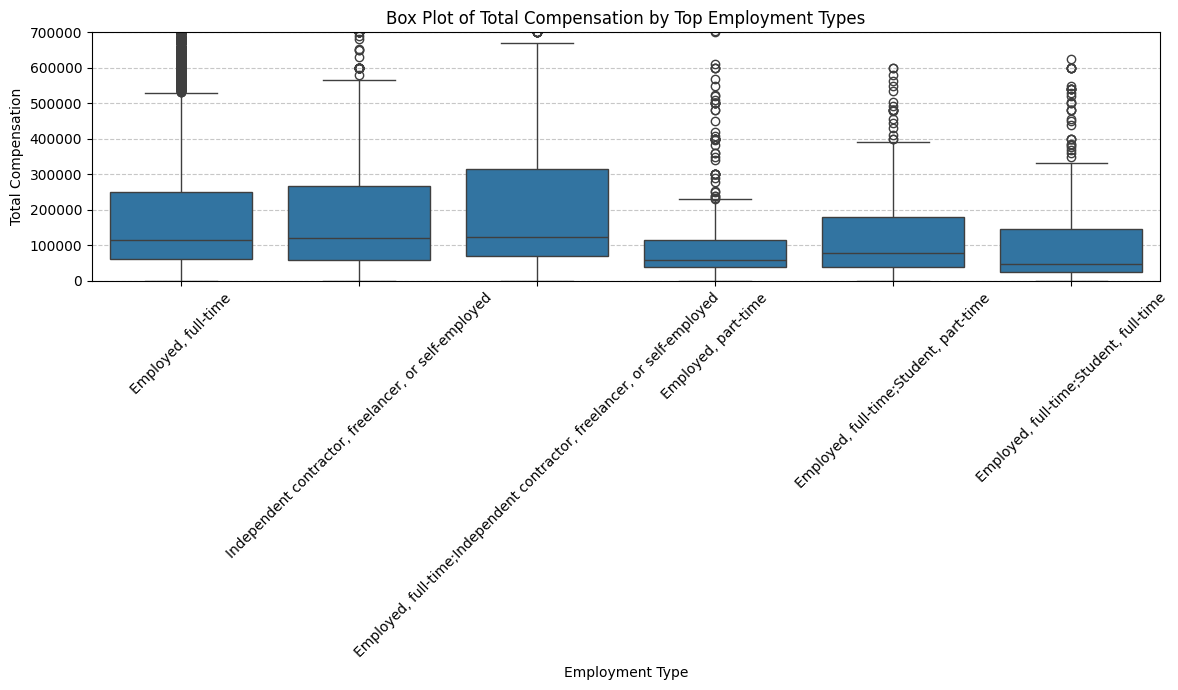

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données nécessaires
QUERY = """
SELECT CompTotal, Employment
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# 2. Nettoyer les données : supprimer les lignes avec valeurs manquantes
df_clean = df.dropna(subset=['CompTotal', 'Employment'])

# 3. Sélectionner les 6 types d'emploi les plus fréquents
top_employment_types = df_clean['Employment'].value_counts().head(6).index.tolist()
df_top = df_clean[df_clean['Employment'].isin(top_employment_types)]

# 4. Calculer la limite supérieure (quantile pour couper les extrêmes)
upper_limit = df_top['CompTotal'].quantile(0.85)

# 5. Tracer le boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(
    x='Employment',
    y='CompTotal',
    data=df_top,
    order=top_employment_types
)
plt.title('Box Plot of Total Compensation by Top Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.ylim(0, upper_limit)  # Limite supérieure dynamique
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<ipython-input-131-655b52b7f252>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace({
<ipython-input-131-655b52b7f252>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['SatisfactionLevel'] = pd.cut(


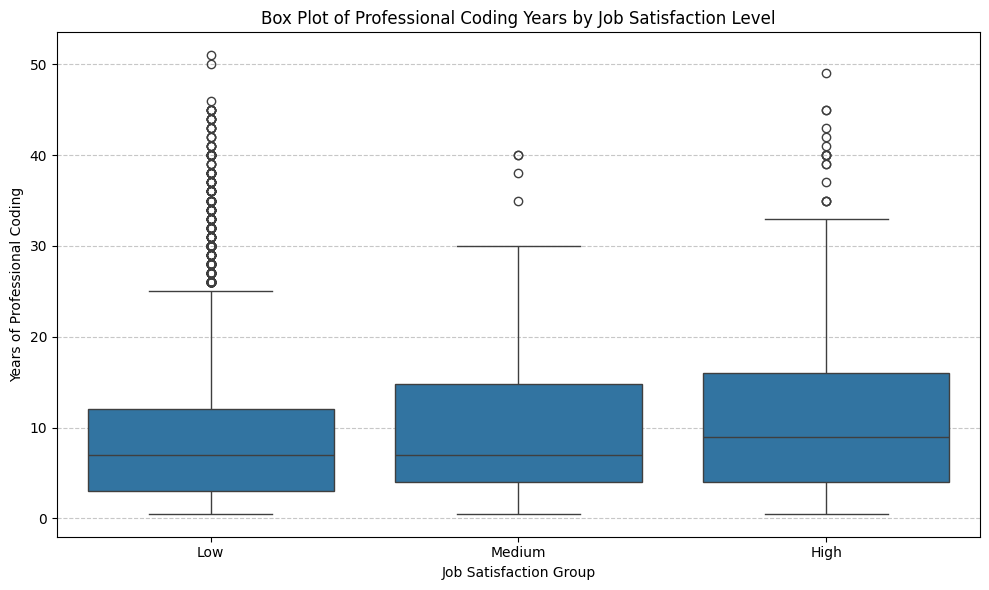

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# 2. Nettoyage des données
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# 3. Conversion des années d'expérience en valeurs numériques
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)

# 4. Regrouper les niveaux de satisfaction en 3 catégories (Low, Medium, High)
# Supposons que JobSatPoints_6 soit sur une échelle de 1 à 6
df_clean['SatisfactionLevel'] = pd.cut(
    df_clean['JobSatPoints_6'],
    bins=[0, 2, 4, 6],  # (0,2] = Low, (2,4] = Medium, (4,6] = High
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# 5. Tracer le boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='SatisfactionLevel',
    y='YearsCodePro',
    data=df_clean,
    order=['Low', 'Medium', 'High']
)
plt.title('Box Plot of Professional Coding Years by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Group')
plt.ylabel('Years of Professional Coding')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [132]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
